In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
gender={'Male':0,'Female':1}
data.Gender=[gender[i] for i in data.Gender]
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [6]:
inp=data.iloc[:,[2,3]].values
out=data.iloc[:,4].values


In [7]:
train_x,test_x,train_y,test_y=train_test_split(inp,out,test_size=0.3,random_state=0)

In [8]:
# feature scaling
sc=StandardScaler()
train_x = sc.fit_transform(train_x)
test_x=sc.fit_transform(test_x)

/home/yogesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
cf=LogisticRegression(random_state=0)
cf.fit(train_x,train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred = cf.predict(test_x)

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [12]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [13]:
# confusion matrix
cm=confusion_matrix(test_y,y_pred)
cm

array([[74,  5],
       [ 9, 32]])

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y,y_pred)
acc*100

88.33333333333333

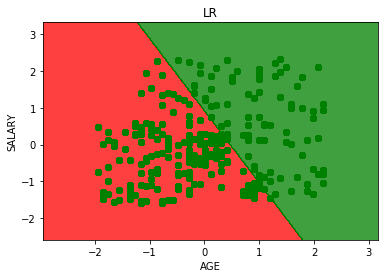

In [15]:
from matplotlib.colors import ListedColormap
x,y = train_x,train_y
x1,x2=np.meshgrid(np.arange(start= x[:,0].min() -1 , stop = x[:,0].max()+1 , step=0.01),
                  np.arange(start= x[:,1].min() -1 , stop = x[:,1].max()+1 , step=0.01))
plt.contourf(x1,x2,cf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(y):
    plt.scatter(x[y==j,0],x[y==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('LR')
plt.xlabel('AGE')
plt.ylabel("SALARY")
plt.show()

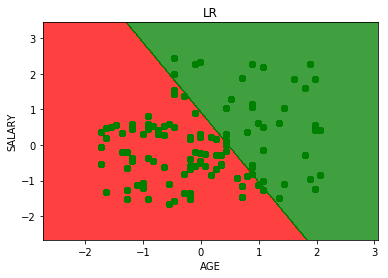

In [16]:
from matplotlib.colors import ListedColormap
x,y = test_x,test_y
x1,x2=np.meshgrid(np.arange(start= x[:,0].min() -1 , stop = x[:,0].max()+1 , step=0.01),
                  np.arange(start= x[:,1].min() -1 , stop = x[:,1].max()+1 , step=0.01))
plt.contourf(x1,x2,cf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(y):
    plt.scatter(x[y==j,0],x[y==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('LR')
plt.xlabel('AGE')
plt.ylabel("SALARY")
plt.show()